# Desafío - Gráficos
Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). Una vez terminado el desafío, comprime la carpeta y sube el .zip


### 1. Genere una submuestra de casos
* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria. 
* Seleccione el 50% de los casos.
* Cada base generada debe contener los siguientes elementos:
* El índice de desarrollo humano ( undp_hdi ) El nombre del país ( ccodealp )
* La región a la que pertenece ( ht_region ) El PIB per capita. ( gle_cgdpc )
* El total de la población ( imf_pop )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lec3_graphs as gfx
import scipy.stats as stats

In [2]:
df = pd.read_csv("qog_std_cs_jan18.csv")

In [3]:
df.head()

ccode        cname ccodealp  ccodecow  ccodewb        version  aid_cpnc  \
0      4  Afghanistan      AFG     700.0      4.0  QoGStdCSJan18       NaN   
1      8      Albania      ALB     339.0      8.0  QoGStdCSJan18       NaN   
2     12      Algeria      DZA     615.0     12.0  QoGStdCSJan18       NaN   
3     20      Andorra      AND     232.0     20.0  QoGStdCSJan18       NaN   
4     24       Angola      AGO     540.0     24.0  QoGStdCSJan18       NaN   

   aid_cpsc  aid_crnc  aid_crnio  ...  wvs_relacc  wvs_relsch  wvs_relsci  \
0       NaN      29.0       13.0  ...         NaN         NaN         NaN   
1       NaN      26.0       13.0  ...         NaN         NaN         NaN   
2       NaN      21.0        6.0  ...    3.710616    1.704692    3.681347   
3       NaN       NaN        NaN  ...         NaN         NaN         NaN   
4       NaN      22.0       13.0  ...         NaN         NaN         NaN   

   wvs_satfin  wvs_satlif  wvs_screl  wvs_subh  wvs_survself  wvs_tradrat  \
0         NaN         NaN        NaN       NaN           NaN          NaN   
1         NaN         NaN        NaN       NaN           NaN          NaN   
2    5.988125    6.301029   5.339371  3.805579     -0.409807    -0.498164   
3         NaN         NaN        NaN       NaN           NaN          NaN   
4         NaN         NaN        NaN       NaN           NaN          NaN   

   wvs_trust  
0        NaN  
1        NaN  
2   0.179286  
3        NaN  
4        NaN  

[5 rows x 1882 columns]

In [4]:
df.shape

(194, 1882)

In [5]:
df_pibi = df.sample(n=97, random_state=8883) #97 corresponde a la mitad de los casos

In [6]:
df_pibi

ccode        cname ccodealp  ccodecow  ccodewb        version  aid_cpnc  \
15      56      Belgium      BEL     211.0     56.0  QoGStdCSJan18     102.0   
20      76       Brazil      BRA     140.0     76.0  QoGStdCSJan18       NaN   
190    862    Venezuela      VEN     101.0    862.0  QoGStdCSJan18       NaN   
12      50   Bangladesh      BGD     771.0     50.0  QoGStdCSJan18       NaN   
163    728  South Sudan      SSD     626.0      NaN  QoGStdCSJan18       NaN   
..     ...          ...      ...       ...      ...            ...       ...   
117    512         Oman      OMN     698.0    512.0  QoGStdCSJan18       NaN   
7       32    Argentina      ARG     160.0     32.0  QoGStdCSJan18       NaN   
68     308      Grenada      GRD      55.0    308.0  QoGStdCSJan18       NaN   
3       20      Andorra      AND     232.0     20.0  QoGStdCSJan18       NaN   
172    768         Togo      TGO     461.0    768.0  QoGStdCSJan18       NaN   

        aid_cpsc  aid_crnc  aid_crnio  ...  wvs_relacc  wvs_relsch  \
15   890313152.0       NaN        NaN  ...         NaN         NaN   
20           NaN      26.0       11.0  ...    1.982908    2.828536   
190          NaN      20.0        6.0  ...         NaN         NaN   
12           NaN      25.0       16.0  ...         NaN         NaN   
163          NaN      24.0       14.0  ...         NaN         NaN   
..           ...       ...        ...  ...         ...         ...   
117          NaN       NaN        NaN  ...         NaN         NaN   
7            NaN      23.0        7.0  ...    1.850180    2.163982   
68           NaN       9.0        3.0  ...         NaN         NaN   
3            NaN       NaN        NaN  ...         NaN         NaN   
172          NaN      21.0       15.0  ...         NaN         NaN   

     wvs_relsci  wvs_satfin  wvs_satlif  wvs_screl  wvs_subh  wvs_survself  \
15          NaN         NaN         NaN        NaN       NaN           NaN   
20     2.431594    6.214656    7.840864   4.016381  3.923859      0.096261   
190         NaN         NaN         NaN        NaN       NaN           NaN   
12          NaN         NaN         NaN        NaN       NaN           NaN   
163         NaN         NaN         NaN        NaN       NaN           NaN   
..          ...         ...         ...        ...       ...           ...   
117         NaN         NaN         NaN        NaN       NaN           NaN   
7      2.091454    6.517899    7.488213   6.504242  3.989496      0.161507   
68          NaN         NaN         NaN        NaN       NaN           NaN   
3           NaN         NaN         NaN        NaN       NaN           NaN   
172         NaN         NaN         NaN        NaN       NaN           NaN   

     wvs_tradrat  wvs_trust  
15           NaN        NaN  
20     -0.420442   0.071162  
190          NaN        NaN  
12           NaN        NaN  
163          NaN        NaN  
..           ...        ...  
117          NaN        NaN  
7      -0.103415   0.198548  
68           NaN        NaN  
3            NaN        NaN  
172          NaN        NaN  

[97 rows x 1882 columns]

Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:

* ffp_hf : Human Flight and Brain Drain
* wef_qes : Quality of the educational system
* wdi_expedu : Government expenditure on education, total (% of GDP)
* wdi_ners : School enrollment, secondary (% net)
* Guarde esta tabla procesada en un nuevo objeto
* Renombre las categorías de la variable ht_region de números a regiones

In [7]:
hdi_group = df_pibi.loc[:, ['cname','undp_hdi','ccodealp', 'ht_region','gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 
                          'wdi_expedu', 'wdi_ners']]

In [8]:
hdi_group.head(5)

cname  undp_hdi ccodealp  ht_region   gle_cgdpc     imf_pop  \
15       Belgium     0.895      BEL          5  33764.7110   11.181000   
20        Brazil     0.754      BRA          2   9815.2402  202.768997   
190    Venezuela     0.769      VEN          2  10513.9600         NaN   
12    Bangladesh     0.575      BGD          8   1796.6400  154.695007   
163  South Sudan     0.421      SSD          4         NaN         NaN   

     ffp_hf   wef_qes  wdi_expedu   wdi_ners  
15      1.9  5.328891     6.58514  95.285599  
20      4.1  2.720419     5.99395  82.829079  
190     5.2  2.640229         NaN  74.789711  
12      7.5  3.293150     1.95726  57.239899  
163     6.9       NaN     1.71297        NaN

In [9]:
df_reg = df.groupby(('ht_region')).ht_region.sum()
df_reg

ht_region
1      28
2      40
3      60
4     196
5     135
6      36
7      77
8      64
9     108
10    130
Name: ht_region, dtype: int64

¿Cuantas regiones hay?

Hay 10 regiones

Recodificar el ht_region de un num a una etiqueta de cadena en replace 1er argumento: 
* Cuales son los valores originales que vamos a utilizar y el 2° argumentos que vamos a reemplazar


In [10]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

In [11]:
hdi_group.head(5)

cname  undp_hdi ccodealp  ht_region   gle_cgdpc     imf_pop  \
15       Belgium     0.895      BEL          5  33764.7110   11.181000   
20        Brazil     0.754      BRA          2   9815.2402  202.768997   
190    Venezuela     0.769      VEN          2  10513.9600         NaN   
12    Bangladesh     0.575      BGD          8   1796.6400  154.695007   
163  South Sudan     0.421      SSD          4         NaN         NaN   

     ffp_hf   wef_qes  wdi_expedu   wdi_ners region_recod  
15      1.9  5.328891     6.58514  95.285599   WesternDem  
20      4.1  2.720419     5.99395  82.829079        LatAm  
190     5.2  2.640229         NaN  74.789711        LatAm  
12      7.5  3.293150     1.95726  57.239899    SouthAsia  
163     6.9       NaN     1.71297        NaN  SubSaharian

### 2. Genere una función que ingrese su objeto y devuelva:

* Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
* Para cada variable discreta, que calcule la frecuencia.
* Reporte las estadísticas descriptivas para gle_cgdpc , undp_hdi , imf_pop .
* Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [12]:
def medias_descriptivas(dataframe): 
    for colname, colserie in dataframe.iteritems():
        if pd.api.types.is_numeric_dtype(colserie):
            print(colname)
            print(colserie.describe())
        else:
            print(colname)
            print(colserie.describe())
        print('\n')            

medias_descriptivas(hdi_group)

cname
count          97
unique         97
top       Bahamas
freq            1
Name: cname, dtype: object


undp_hdi
count    93.000000
mean      0.703860
std       0.153687
min       0.406000
25%       0.603000
50%       0.734000
75%       0.823000
max       0.948000
Name: undp_hdi, dtype: float64


ccodealp
count      97
unique     97
top       MDA
freq        1
Name: ccodealp, dtype: object


ht_region
count    97.000000
mean      4.701031
std       2.761962
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64


gle_cgdpc
count        96.000000
mean      13523.741220
std       15907.957278
min         488.269990
25%        2670.137500
50%        8537.849600
75%       20450.759500
max      104049.440000
Name: gle_cgdpc, dtype: float64


imf_pop
count     73.000000
mean      27.943260
std       55.778782
min        0.012000
25%        1.261000
50%        6.929000
75%       30.770000
max      318.789001
Name: imf_

In [13]:
df_mneira = df.sample(n=97, random_state=3214) #Dataframe de Melissa Neira
hdi_group_mn = df_mneira.loc[:, ['cname','undp_hdi','ccodealp', 'ht_region','gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 
                          'who_tobt', 'wdi_exph']]
hdi_group_mn['region_recod'] = hdi_group['ht_region'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
hdi_group_mn.head(5)

cname  undp_hdi ccodealp  ht_region   gle_cgdpc    imf_pop  \
168  Switzerland     0.938      CHE          5  50454.4100   8.140000   
146     St Lucia     0.735      LCA         10  11095.8000   0.167000   
115      Morocco     0.645      MAR          3   3999.5601  33.179001   
79          Iraq     0.649      IRQ          3   4178.2598  32.577999   
98         Libya     0.719      LBY          3   4102.8398   6.266000   

     wef_imort  who_alc2000  who_tobt   wdi_exph region_recod  
168   3.700000         9.61      24.1  11.659268   WesternDem  
146        NaN         9.97       NaN   6.719041          NaN  
115  26.799999         0.43      22.0   5.907778          NaN  
79         NaN         0.17       NaN   5.538873  NorthAfrica  
98   13.200000         0.00       NaN   4.968935  NorthAfrica

In [14]:
medias_descriptivas(hdi_group_mn)

cname
count          97
unique         97
top       Bahamas
freq            1
Name: cname, dtype: object


undp_hdi
count    94.000000
mean      0.693553
std       0.156267
min       0.399000
25%       0.555250
50%       0.733500
75%       0.817000
max       0.948000
Name: undp_hdi, dtype: float64


ccodealp
count      97
unique     97
top       PLW
freq        1
Name: ccodealp, dtype: object


ht_region
count    97.000000
mean      4.793814
std       2.738378
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64


gle_cgdpc
count       95.000000
mean     13142.335390
std      14240.819781
min        488.269990
25%       2375.055050
50%       8761.139600
75%      20431.825000
max      64342.711000
Name: gle_cgdpc, dtype: float64


imf_pop
count     76.000000
mean      23.250303
std       35.406350
min        0.012000
25%        1.304000
50%        6.904500
75%       33.758250
max      186.190002
Name: imf_pop, dty

La comparación de los dos dataframe arroja distintas medidas descriptivas dado que la semilla es distinta.

Además se pierden valores distintos al aplicar dropna().

### 3. Genere una función que liste las observaciones perdidas de una variable
La función debe contener los siguientes argumentos:
* dataframe : La función debe ingresar un objeto DataFrame.
* var : Variable a inspeccionar.
* print_list : Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.

La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.

Cuando print_list = True , debe retornar la lista de casos.
Analice todas las variables y sus casos perdidos. Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [15]:
def ver_data_perdida(dataframe,var,print_list = False):
    
    cantidad_data_perdida = dataframe[var].isnull().sum()
    porcentaje_data_perdida = cantidad_data_perdida/len(dataframe[var])
    print("\n Columna:\t\t\t{} \n Cantidad de datos perdidos: \t{} \n Frecuencia:\t\t\t{:.2%}".format(var,cantidad_data_perdida,porcentaje_data_perdida))
    
    if print_list:
        print(' Paises con datos perdidos :\t', dataframe.loc[dataframe[var].isnull()]['cname'].unique())

    print('___________________________________________________________________________________________________________________')



In [16]:
for colname, serie in hdi_group.iteritems():
    ver_data_perdida(hdi_group, colname)


 Columna:			cname 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			undp_hdi 
 Cantidad de datos perdidos: 	4 
 Frecuencia:			4.12%
___________________________________________________________________________________________________________________

 Columna:			ccodealp 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			ht_region 
 Cantidad de datos perdidos: 	0 
 Frecuencia:			0.00%
___________________________________________________________________________________________________________________

 Columna:			gle_cgdpc 
 Cantidad de datos perdidos: 	1 
 Frecuencia:			1.03%
___________________________________________________________________________________________________________________

 Columna:			imf_pop 
 Cantidad de d

In [17]:

for colname in ['wdi_ners', 'wdi_expedu', 'wef_qes']:
    ver_data_perdida(hdi_group, colname, True)


 Columna:			wdi_ners 
 Cantidad de datos perdidos: 	25 
 Frecuencia:			25.77%
 Paises con datos perdidos :	 ['South Sudan' 'Djibouti' 'Bahamas' 'Gabon' 'Sierra Leone' 'Azerbaijan'
 'Trinidad and Tobago' 'Tanzania' 'Somalia' 'Congo' 'Papua New Guinea'
 'United Arab Emirates' 'Algeria' 'Botswana' 'Libya' 'Gambia' 'Iraq'
 'Slovakia' 'China' 'Maldives' 'Micronesia' 'Tunisia' 'Liberia' 'Andorra'
 'Togo']
___________________________________________________________________________________________________________________

 Columna:			wdi_expedu 
 Cantidad de datos perdidos: 	27 
 Frecuencia:			27.84%
 Paises con datos perdidos :	 ['Venezuela' 'Suriname' 'Marshall Islands' 'Syria' 'Tonga' 'Djibouti'
 'Bahamas' 'Lesotho' 'Cuba' 'Samoa' 'Trinidad and Tobago' 'Eritrea'
 'Nauru' 'Somalia' 'Congo' 'Papua New Guinea' 'United Arab Emirates'
 'Algeria' 'Botswana' 'Libya' 'Iraq' 'Korea, North' 'China' 'Dominica'
 'Egypt' 'Saudi Arabia' 'Grenada']
________________________________________________________

### 4. Grafique los histogramas

* Genere una función que grafique un histograma en conjunto y señale las medias.
* La función debe incluír los siguientes argumentos:
    * dataframe : La base de datos donde se encuentran los datos específicos.
    * var : La variable a graficar.
    * sample_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser False.
    * true_mean : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa. 
* Implemente las funciones para las 4 variables seleccionadas según su grupo.


¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

In [18]:
def graficar_histograma(dataframe, var, sample_mean = False, true_mean = False):
    plt.grid()
    df_dropna = df[var].dropna()
    df_dropna_gb = dataframe[var].dropna()
    media = df_dropna.mean()
    media_grupo = df_dropna_gb.mean()
    plt.hist(df_dropna_gb, color='grey', alpha=.4)
    
    if (sample_mean):
        plt.axvline(media_grupo, color = 'tomato', lw=3, linestyle = '-', label="sub df median" )
    
    if (true_mean):    
        plt.axvline(media, color = 'blue', lw=3, linestyle = '-', label="df median")
    
    plt.title("Histograma de {}".format(var))    
    plt.legend(loc='upper right')
    
    if (media_grupo > media):
        print('En la variable {} la media de la submuestra SI es mayor a la media de la muestra completa'.format(var))
    else:
        print('En la variable {} la media de la submuestra NO es mayor a la media de la muestra completa'.format(var))

En la variable ffp_hf la media de la submuestra NO es mayor a la media de la muestra completa


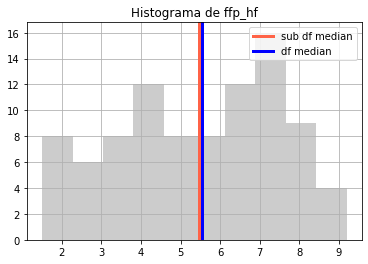

In [19]:
graficar_histograma(hdi_group,'ffp_hf',True,True)

En la variable wef_qes la media de la submuestra SI es mayor a la media de la muestra completa


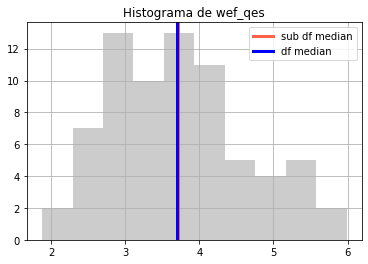

In [20]:
graficar_histograma(hdi_group,'wef_qes',True,True)

En la variable wdi_expedu la media de la submuestra SI es mayor a la media de la muestra completa


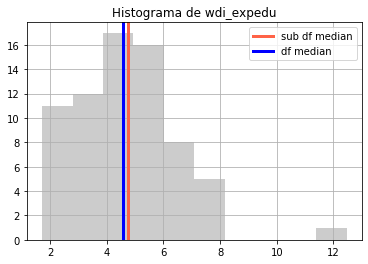

In [21]:
graficar_histograma(hdi_group,'wdi_expedu',True,True)

En la variable wdi_ners la media de la submuestra SI es mayor a la media de la muestra completa


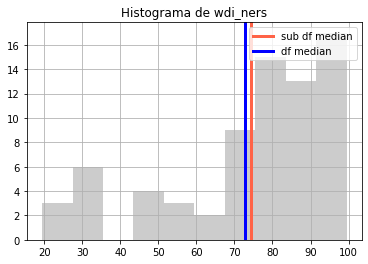

In [22]:
graficar_histograma(hdi_group,'wdi_ners',True,True)

### 5. Genere una función que devuelva un dotplot

* La función debe contener los siguientes argumentos como argumentos:
    * dataframe : La tabla de datos donde buscar las variables.
    * plot_var : La variable a analizar y extraer las medias.
    * plot_by : La variable agrupadora.
    * global_stat : Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False.
    * statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean.
* Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [23]:
def graficar_dotplot(dataframe, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    plt.grid()
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
    if statistic == 'mean':
        plot = dataframe.groupby(plot_by)[plot_var].mean()
    elif statistic == 'median':
        plot = dataframe.groupby(plot_by)[plot_var].median()
    plt.plot(plot.values, plot.index, 'x')
    if global_stat:
        if statistic == 'mean':
            plt.axvline(dataframe[plot_var].mean(), color='green', linestyle='-')
            print(dataframe[plot_var].mean(), dataframe[plot_var].median())
        elif statistic == 'median':
            plt.axvline(dataframe[plot_var].median(), color='green', linestyle='-')

0.7038602146236559 0.73400003


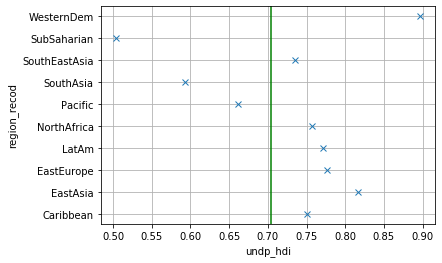

In [24]:
graficar_dotplot(hdi_group,'undp_hdi','region_recod',True,'mean')

13523.741220104172 8537.849600000001


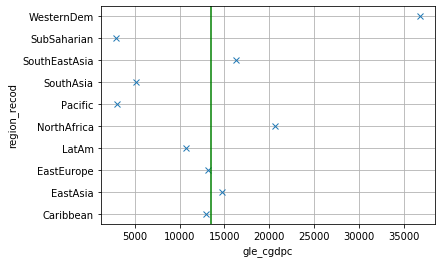

In [25]:
graficar_dotplot(hdi_group,'gle_cgdpc','region_recod',True,'mean')  

5.468131863153898 5.5


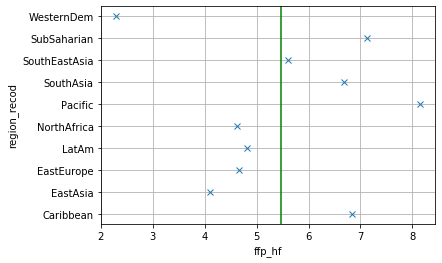

In [26]:
graficar_dotplot(hdi_group,'ffp_hf','region_recod',True,'mean') 

### 6. Guarde la base de datos

La submuestra creada tiene un método llamado to_csv .

Acceda a éste y guarde la base de datos con la siguiente nomenclatura:

subsample_iniciales.csv

In [27]:
hdi_group.to_csv('subsample_pibi.csv', encoding='ascii', index=False)

In [28]:
subsample_pibi = pd.read_csv('subsample_pibi.csv')

In [29]:
subsample_pibi.head()

cname  undp_hdi ccodealp  ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0      Belgium     0.895      BEL          5  33764.7110   11.181000     1.9   
1       Brazil     0.754      BRA          2   9815.2402  202.768997     4.1   
2    Venezuela     0.769      VEN          2  10513.9600         NaN     5.2   
3   Bangladesh     0.575      BGD          8   1796.6400  154.695007     7.5   
4  South Sudan     0.421      SSD          4         NaN         NaN     6.9   

    wef_qes  wdi_expedu   wdi_ners region_recod  
0  5.328891     6.58514  95.285599   WesternDem  
1  2.720419     5.99395  82.829079        LatAm  
2  2.640229         NaN  74.789711        LatAm  
3  3.293150     1.95726  57.239899    SouthAsia  
4       NaN     1.71297        NaN  SubSaharian